# 決定木

In [1]:
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

/Users/arakawariku/.pyenv/versions/miniconda3-3.19.0/envs/ml_env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                           mnist.target.astype('int32'), random_state=42)
mnist_X = mnist_X / 255.0
train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=43)

## scikit-learnの分類器を使用

In [3]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(train_X, train_y)

In [4]:
pred_y = clf.predict(test_X)
f1_score(test_y[:len(pred_y)], pred_y, average='macro')

0.85267443278552579

## 決定木の可視化

In [7]:
with open('graph.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    ### WRITEME

## 応用
* 木の深さを変えてみて、挙動を調べる。

In [6]:
range_array = list(range(3,20))
score_array = []

for i in range_array:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y[:len(pred_y)], pred_y, average='macro')
    score_array.append(score)

/Users/arakawariku/.pyenv/versions/miniconda3-3.19.0/envs/ml_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


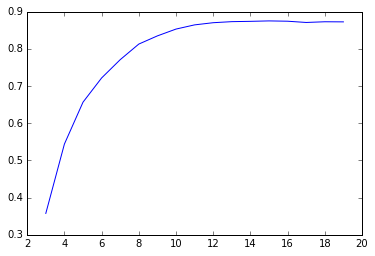

In [8]:
plt.plot(range_array, score_array)